<a href="https://colab.research.google.com/github/Patortiz26/IN6531-Miner-a-de-datos-2021-2/blob/main/Aux4_IN6531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Auxiliar 4 - IN6531
**Autor: Patricio Ortiz**

##Clasificación

En una tarea de **aprendizaje supervisado**, por lo tanto existen clases definidas dentro del dataset. Las clases también llamadas objetivos(targets), etiquetas(labels) o categorias son el objeto que se busca determinar.

Los algoritmos de clasificación buscan aproximar una función (f) que "mapee" a los features de input (X) con la variable a determinar (y).


En la clase de hoy revisaremos algunos ejemplos de clasificadores existentes.

##Validación de clasificadores

La "gracia" de los clasificadores es que podemos evaluar mediante métricas objetivas el desempeño de cada algoritmo, lo cual nos permite decidir "cual clasificador es mejor". Para ello tenemos distintas métricas como:
* Accuracy
* Recall
* Precision
* F1-Score

links:
* [Matriz de confusión y métricas](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) 

* [Curvas AUC y ROC](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5#:~:text=AUC%20%2D%20ROC%20curve%20is%20a,capable%20of%20distinguishing%20between%20classes.)


##Exploración de datos

Hoy trabajaremos con el archivo excel subido por el profesor en material docente.

In [1]:
#Importamos librerías de siempre
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
#Primero importamos los datos y vemos los primeros.
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/IN6531 - Minería de Datos DII/Auxiliares IN6531/datos/aux4/Datos_aux4.xlsx")
df.head()

,Cod_Cliente,COD_OFI,COM,ED,SX,NIV_EDUC,RENTA,E_CIVIL,VIG,TRX_T,TRX_T-1,TRX_T-2,SALDO_T,SALDO_T-1,SALDO_T-2,SALDO_T-3,SALDO_T-4,SALDO_T-5,CERRO
0,1,59,88,86,M,UNV,1900,CAS,262,27,15,24,48073799.25,903165.45,808209.00,4365589.05,3703754.29,2153243.04,0
1,2,47,66,82,M,MED,250,CAS,72,21,23,49,60369.29,43859.50,39065.10,55232.43,223181.43,0.00,1
2,3,10,5,72,M,UNV,700,CAS,187,24,9,27,67877.14,-106620.70,170602.48,180041.05,248783.81,546633.81,1
3,4,47,66,81,M,UNV,440,SOL,130,21,12,18,6543424.05,7259501.00,7176502.29,23091898.57,18446246.67,19383065.22,0
4,5,37,81,64,M,UNV,650,CAS,36,14,17,27,5501529.00,6822243.86,10946776.71,23671060.95,15813760.48,20792048.26,0


In [111]:
#Analizamos la forma del dataframe
df.shape

(1248, 19)

In [112]:
#revisar valores nulos
df.isna().sum()

Cod_Cliente    0
COD_OFI        0
COM            0
ED             0
SX             0
NIV_EDUC       0
RENTA          0
E_CIVIL        0
VIG            0
TRX_T          0
TRX_T-1        0
TRX_T-2        0
SALDO_T        0
SALDO_T-1      0
SALDO_T-2      0
SALDO_T-3      0
SALDO_T-4      0
SALDO_T-5      0
CERRO          0
dtype: int64

In [113]:
#numero de valores por columna
df.nunique()

Cod_Cliente    1248
COD_OFI         127
COM             140
ED               63
SX                3
NIV_EDUC          6
RENTA           479
E_CIVIL           4
VIG             201
TRX_T           149
TRX_T-1         135
TRX_T-2         154
SALDO_T        1127
SALDO_T-1      1149
SALDO_T-2      1157
SALDO_T-3      1162
SALDO_T-4      1144
SALDO_T-5       775
CERRO             2
dtype: int64

> Notamos que hay 3 variables que son categoricas: SX - NIV_EDUC - E_CIVIL

In [114]:
df.SX.unique()

array(['M       ', 'F       ', '        '], dtype=object)

In [115]:
df.NIV_EDUC.unique()

array(['UNV     ', 'MED     ', 'TEC     ', 'BAS     ', '        ',
       'EUN     '], dtype=object)

In [116]:
df.E_CIVIL.unique()

array(['CAS     ', 'SOL     ', 'VIU     ', 'SEP     '], dtype=object)

In [117]:
#filtramos valores faltantes
df = df[df.SX != '        ']
df = df[df.NIV_EDUC != '        ']

In [118]:
#Volvemos a revisar forma del dataframe
df.shape

(1239, 19)

In [119]:
#eliminamos variables que no dicen nada
df = df.drop(columns=['Cod_Cliente','COD_OFI'])

In [120]:
df.columns

Index(['COM', 'ED', 'SX', 'NIV_EDUC', 'RENTA', 'E_CIVIL', 'VIG', 'TRX_T',
       'TRX_T-1', 'TRX_T-2', 'SALDO_T', 'SALDO_T-1', 'SALDO_T-2', 'SALDO_T-3',
       'SALDO_T-4', 'SALDO_T-5', 'CERRO'],
      dtype='object')

In [121]:
#Dividimos en X e y (nueva forma) 
X = df.loc[:, ['COM', 'ED', 'SX', 'NIV_EDUC', 'RENTA', 'E_CIVIL', 'VIG', 'TRX_T',
       'TRX_T-1', 'TRX_T-2', 'SALDO_T', 'SALDO_T-1', 'SALDO_T-2', 'SALDO_T-3', 'SALDO_T-4', 'SALDO_T-5']]

y =  df.loc[:, ['CERRO']]

> Importante notar que ahora usamos `loc` y no `iloc`. La diferencia es que el primero recibe strings mientras que el segundo acepta enteros.

In [122]:
X.head()

,COM,ED,SX,NIV_EDUC,RENTA,E_CIVIL,VIG,TRX_T,TRX_T-1,TRX_T-2,SALDO_T,SALDO_T-1,SALDO_T-2,SALDO_T-3,SALDO_T-4,SALDO_T-5
0,88,86,M,UNV,1900,CAS,262,27,15,24,48073799.25,903165.45,808209.00,4365589.05,3703754.29,2153243.04
1,66,82,M,MED,250,CAS,72,21,23,49,60369.29,43859.50,39065.10,55232.43,223181.43,0.00
2,5,72,M,UNV,700,CAS,187,24,9,27,67877.14,-106620.70,170602.48,180041.05,248783.81,546633.81
3,66,81,M,UNV,440,SOL,130,21,12,18,6543424.05,7259501.00,7176502.29,23091898.57,18446246.67,19383065.22
4,81,64,M,UNV,650,CAS,36,14,17,27,5501529.00,6822243.86,10946776.71,23671060.95,15813760.48,20792048.26


In [123]:
y.head()

,CERRO
0,0
1,1
2,1
3,0
4,0


In [124]:
#Para procesar variables independientes / categoricas (NUEVO TRUCO)
X = pd.get_dummies(X, columns = ['SX'])
X.head()

,COM,ED,NIV_EDUC,RENTA,E_CIVIL,VIG,TRX_T,TRX_T-1,TRX_T-2,SALDO_T,SALDO_T-1,SALDO_T-2,SALDO_T-3,SALDO_T-4,SALDO_T-5,SX_F,SX_M
0,88,86,UNV,1900,CAS,262,27,15,24,48073799.25,903165.45,808209.00,4365589.05,3703754.29,2153243.04,0,1
1,66,82,MED,250,CAS,72,21,23,49,60369.29,43859.50,39065.10,55232.43,223181.43,0.00,0,1
2,5,72,UNV,700,CAS,187,24,9,27,67877.14,-106620.70,170602.48,180041.05,248783.81,546633.81,0,1
3,66,81,UNV,440,SOL,130,21,12,18,6543424.05,7259501.00,7176502.29,23091898.57,18446246.67,19383065.22,0,1
4,81,64,UNV,650,CAS,36,14,17,27,5501529.00,6822243.86,10946776.71,23671060.95,15813760.48,20792048.26,0,1


In [125]:
X = pd.get_dummies(X, columns = ['NIV_EDUC'])
X = pd.get_dummies(X, columns = ['E_CIVIL'])

In [126]:
X.head()

,COM,ED,RENTA,VIG,TRX_T,TRX_T-1,TRX_T-2,SALDO_T,SALDO_T-1,SALDO_T-2,SALDO_T-3,SALDO_T-4,SALDO_T-5,SX_F,SX_M,NIV_EDUC_BAS,NIV_EDUC_EUN,NIV_EDUC_MED,NIV_EDUC_TEC,NIV_EDUC_UNV,E_CIVIL_CAS,E_CIVIL_SEP,E_CIVIL_SOL,E_CIVIL_VIU
0,88,86,1900,262,27,15,24,48073799.25,903165.45,808209.00,4365589.05,3703754.29,2153243.04,0,1,0,0,0,0,1,1,0,0,0
1,66,82,250,72,21,23,49,60369.29,43859.50,39065.10,55232.43,223181.43,0.00,0,1,0,0,1,0,0,1,0,0,0
2,5,72,700,187,24,9,27,67877.14,-106620.70,170602.48,180041.05,248783.81,546633.81,0,1,0,0,0,0,1,1,0,0,0
3,66,81,440,130,21,12,18,6543424.05,7259501.00,7176502.29,23091898.57,18446246.67,19383065.22,0,1,0,0,0,0,1,0,0,1,0
4,81,64,650,36,14,17,27,5501529.00,6822243.86,10946776.71,23671060.95,15813760.48,20792048.26,0,1,0,0,0,0,1,1,0,0,0


Ahora vamos con algunos gráficos

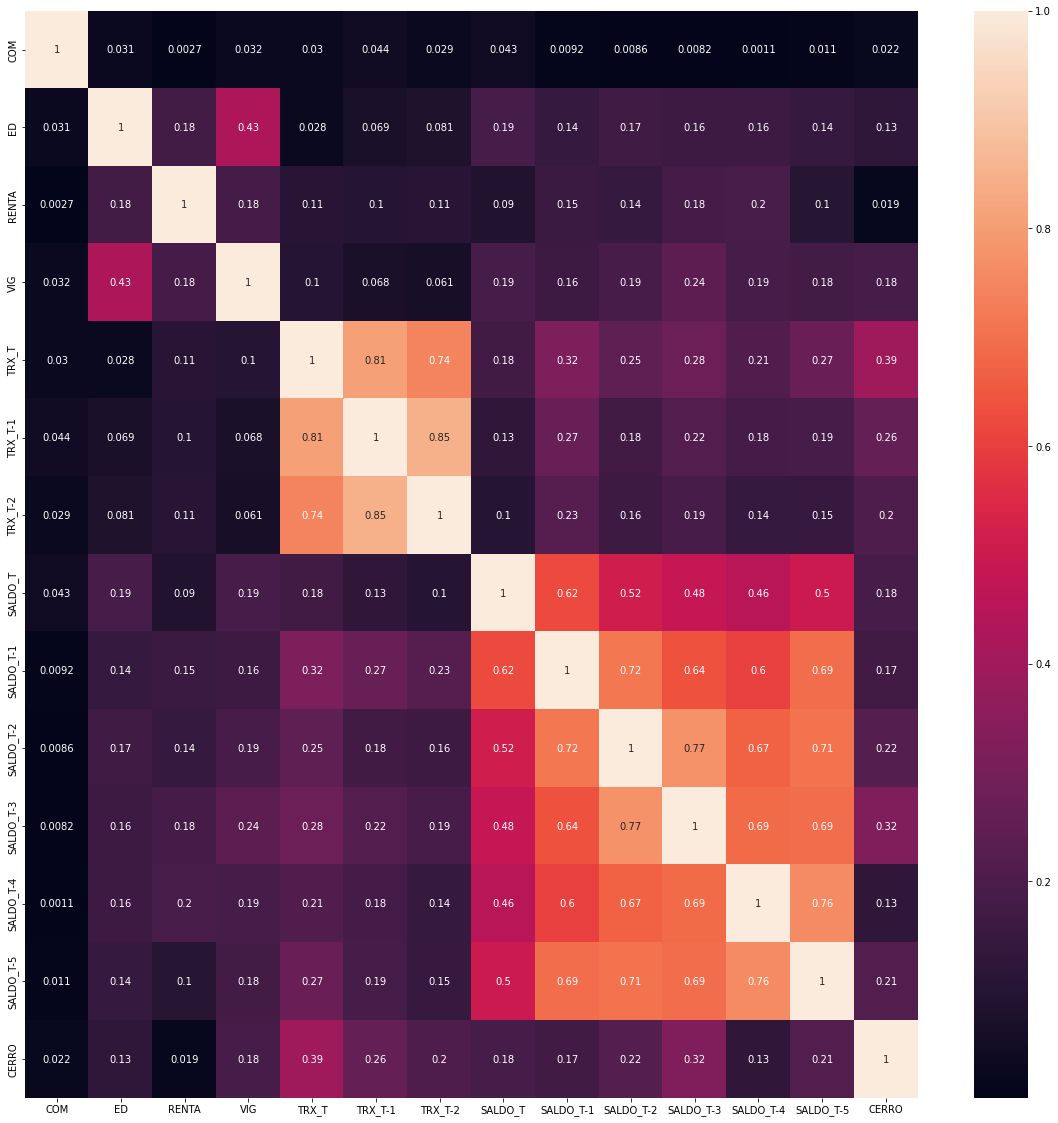

In [127]:
#Heatmap
plt.figure(figsize=(20,20))
corr = df.corr()

sns.heatmap(corr.abs(), xticklabels= corr.columns.values, yticklabels= corr.columns.values, annot=True)

>¿por qué no sirve esa visualización?

Ahora vamos con algo que es un poco más útil.

In [128]:
sns.pairplot(df, hue="CERRO")

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f5696351320> (for post_execute):


KeyboardInterrupt: ignored

In [129]:
#Para procesar variables independientes / categoricas (NUEVO TRUCO 2 - con quintiles) (No se usará)
bd = df.copy()
bd['Ingreso quintil'] = pd.qcut(bd['RENTA'],5,labels=['Bajísimo', 'Bajo', 'Medio', 'Alto', 'Muy alto'])
bd

,COM,ED,SX,NIV_EDUC,RENTA,E_CIVIL,VIG,TRX_T,TRX_T-1,TRX_T-2,SALDO_T,SALDO_T-1,SALDO_T-2,SALDO_T-3,SALDO_T-4,SALDO_T-5,CERRO,Ingreso quintil
0,88,86,M,UNV,1900,CAS,262,27,15,24,48073799.25,903165.45,808209.00,4365589.05,3703754.29,2153243.04,0,Muy alto
1,66,82,M,MED,250,CAS,72,21,23,49,60369.29,43859.50,39065.10,55232.43,223181.43,0.00,1,Bajísimo
2,5,72,M,UNV,700,CAS,187,24,9,27,67877.14,-106620.70,170602.48,180041.05,248783.81,546633.81,1,Alto
3,66,81,M,UNV,440,SOL,130,21,12,18,6543424.05,7259501.00,7176502.29,23091898.57,18446246.67,19383065.22,0,Bajo
4,81,64,M,UNV,650,CAS,36,14,17,27,5501529.00,6822243.86,10946776.71,23671060.95,15813760.48,20792048.26,0,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,88,49,M,UNV,3785,CAS,60,103,60,59,913145.81,758675.60,345568.00,738868.38,3200987.14,0.00,1,Muy alto
1244,88,52,M,UNV,1000,CAS,51,10,5,4,21971.05,21688.00,21504.00,2047.05,0.00,0.00,1,Muy alto
1245,88,32,M,UNV,1200,SOL,33,25,15,31,32610.76,2100.00,20860.86,6954.76,-36221.43,0.00,1,Muy alto
1246,88,52,F,UNV,2115,SOL,28,69,57,78,186783.38,324127.90,284047.86,1354588.48,34972662.86,0.00,1,Muy alto


Ahora bien, cuando hacemos modelos de ML hay dos cosas que tenemos que hacer siempre:

In [161]:
#Dividir los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)

In [162]:
#Escalar datos
from sklearn.preprocessing import StandardScaler #tambien pueden usarse otras formas revisen robustscaler y minmaxscaler
sc = StandardScaler()

X_train_norm = sc.fit_transform(X_train) #Aqui ajustamos segun los parametros y lo transformamos a la nueva escala
X_test_norm = sc.transform(X_test)       #Aqui solo transformamos a la nueva escala

#Como es clasificacion binaria no se debe escalar el output
# y_train_norm = sc.fit_transform(y_train)
# y_test_norm = sc.transform(y_test)

##Clasificador 1: Decision Tree Classifier

In [132]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)   ## Entrenar usando X (features), y (clase)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Con el método **fit** entrenamos el clasificador con los datos de <b>X</b> y la clase asociada a cada uno, **y**. Para ver qué tan bien fue el entrenamiento, podemos evaluar el clasificador ejecutándolo sobre instancias y verificando que la clase sea la correcta. 

Ya hemos entrenado nuestro clasificador empleando **fit**. Luego para predecir, usamos **predict**. Por ejemplo, si ejecutáramos ```clf.predict([[51, 35,..., 0, 1]])```, le estamos pasando al clasificador un dato con valores **[51, 35,..., 0, 1]**. Al ejecutar **predict**, éste nos retornará un arreglo con el valor correspondiente (y_i), indicando que esos datos fueron clasificados como la clase **y_i**.

En **scikit-learn** existe el método **accuracy_score** que computa el Accuracy de la clasificación.

In [133]:
y_pred = clf.predict(X)

In [134]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y, y_pred))

Accuracy: 1.0


> Como se puede apreciar, tuvimos un accuracy del 100% con el clasificador (1.0). Sin embargo, hicimos algo incorrecto: evaluamos el clasificador con los mismos datos con los cuales lo entrenamos!.

> Al hacer esto, lo que terminamos haciendo fue aprender de los datos de entrada y evaluamos (o testeamos) usando los mismos datos. Esto también se denomina **overfitting**.

**Lo que si se debe hacer**

In [163]:
clf = DecisionTreeClassifier()
clf.fit(X_train_norm, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5290322580645161


Lo que indica que tuvimos una **accuracy** de 52,9% ... Lo cual es muy bajo

**¿Donde está el error?**

In [164]:
clf = DecisionTreeClassifier()
clf.fit(X_train_norm, y_train)

y_pred = clf.predict(X_test_norm)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8064516129032258


Lo que indica que tuvimos una **accuracy** de 80,6% ... Lo cual es muuuucho mejor

También podemos calcular la matriz de confusion y otras metricas de desempeño.

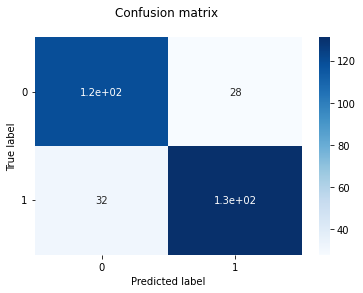

In [165]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Compute confusion matrix. By default is not normalized (normalize=None)
# If necessary change 'y_pred' according to your variable name
cm = confusion_matrix(y_test, y_pred) 

classes = df.CERRO[unique_labels(y_test, y_pred)]

df_i = pd.DataFrame(cm, index = classes, columns = classes)

g = sns.heatmap(df_i, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

In [166]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       147
           1       0.82      0.80      0.81       163

    accuracy                           0.81       310
   macro avg       0.81      0.81      0.81       310
weighted avg       0.81      0.81      0.81       310



Otra herramienta que también utilizaremos es Cross-validation. Con cross-validation, el conjunto de entrenamiento se divide en $k$ conjuntos disjuntos; se entrena sobre los datos correspondientes a $k-1$ de éstos, y se evalúa sobre el conjunto restante. Esto se repite $k$ veces, evaluando siempre sobre un conjunto distinto. Teniendo en cuenta el parámetro $k$, a éste método se le llama $k$-fold cross-validation.

El código que está a continuación realizará 10-fold cross-validation usando Decision Tree sobre los datos. La forma de estimar el rendimiento del clasificador es, entre otras cosas, calculando el promedio de todos los k-folds.

Además se muestra la predición sobre los datos para testear. 

In [167]:
from sklearn.model_selection import cross_validate
import numpy as np

scoring = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']
cv_results = cross_validate(clf, X, y, cv = 10, scoring = scoring, return_train_score= True)

print('Promedio Precision:', np.mean(cv_results['test_precision_macro']))
print('Promedio Recall:', np.mean(cv_results['test_recall_macro']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))
print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))

Promedio Precision: 0.8391463682149214
Promedio Recall: 0.8337091737805645
Promedio F1-score: 0.832997900554109
Promedio Accucary: 0.8337201678468398


##Clasificador [2-n]

Aplicar el resto de los clasificadores es realmente similar a lo anterior, por lo que crearemos una función que nos ayude para los siguientes algoritmos:

*   DecisionTreeClassifier
*   RandomForestClassifier
*   KNeighborsClassifier
*   SVM: https://towardsdatascience.com/the-complete-guide-to-support-vector-machine-svm-f1a820d8af0b

**cof cof** https://archive.ph/ **cof cof**

In [58]:
from sklearn.metrics import f1_score, recall_score, precision_score

def run_classifier(clf, X, y, num_tests=100):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}
    
    for _ in range(num_tests):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

        model = clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)

        metrics['f1-score'].append(f1_score(y_test, predictions)) 
        metrics['recall'].append(recall_score(y_test, predictions))
        metrics['precision'].append(precision_score(y_test, predictions))
    
    return metrics

In [65]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # support vector machine classifier

c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
c2 = ("Random Forest Classifier", RandomForestClassifier())
c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
c4 = ("Support Vector Machines", SVC())

classifiers = [c0, c1, c2, c3, c4]

#X_i = X.values
#y_i = y.values
#y_i = y_i.reshape(1239, )

results = {}
for name, clf in classifiers:
    metrics = run_classifier(clf, X_i, y_i)
    results[name] = metrics
    print("----------------")
    print("Resultados para clasificador: ", name) 
    print("Precision promedio:", np.array(metrics['precision']).mean())
    print("Recall promedio:", np.array(metrics['recall']).mean())
    print("F1-score promedio:", np.array(metrics['f1-score']).mean())
    print("----------------\n\n")  

----------------
Resultados para clasificador:  Base Dummy
Precision promedio: 0.4996508584162186
Recall promedio: 0.5008717561065216
F1-score promedio: 0.49936330399129836
----------------


----------------
Resultados para clasificador:  Decision Tree
Precision promedio: 0.8533177226147975
Recall promedio: 0.838215354336771
F1-score promedio: 0.844865429378176
----------------


----------------
Resultados para clasificador:  Random Forest Classifier
Precision promedio: 0.8740859516989548
Recall promedio: 0.8684658997457326
F1-score promedio: 0.8706209212393802
----------------


----------------
Resultados para clasificador:  KNN
Precision promedio: 0.8400673188896739
Recall promedio: 0.8188714514927381
F1-score promedio: 0.8289945096583865
----------------


----------------
Resultados para clasificador:  Support Vector Machines
Precision promedio: 0.7212429609309562
Recall promedio: 0.9207663544406829
F1-score promedio: 0.808482701345067
----------------




**¿Y si me aparece algun algoritmo nuevo para probar?**

Busquemos su [documentacion](https://colab.research.google.com/drive/1mDYrgWvyJLHRgZgFb3nqnDSE5FfcVWXx?authuser=1#scrollTo=guvd9Y2bCBd3&line=3&uniqifier=1)

##Encontrar hiper párametros

Los hiperparámetros son parámetros que no se aprenden directamente dentro de los estimadores. En scikit-learn se pasan como argumentos al constructor de las clases, por ejemplo cuál kernel usar para Support Vector Classifier, o qué criterio para Decision Tree, etc. Es posible y recomendable buscar en el espacio de hiperparámetros la mejor alternativa.

Tenga en cuenta que es común que un pequeño subconjunto de esos parámetros pueda tener un gran impacto en el rendimiento predictivo o de cálculo del modelo, mientras que otros pueden dejar sus valores predeterminados. Se recomienda leer la documentación de la clase de estimador para obtener una mejor comprensión de su comportamiento esperado.

###GridSearchCV

Una alternativa para seleccionar hiperparámetros es GridSearchCV, la cual considera exhaustivamente todas las combinaciones de parámetros. GridSearchCV recibe un *estimador*, recibe *param_grid* (un diccionario o una lista de diccionarios con los nombres de los parametros a probar como keys y una lista de los valores a probar), *scoring* una o varias funciones de puntuación (score) para evaluar cada combinación de parametros (opciones válidas: https://scikit-learn.org/stable/modules/model_evaluation.html) y *cv* una extrategia para hacer validación cruzada.

El siguiente código muestra cómo seleccionar el número de vecinos y qué pesos otorgar a los vecinos en un clasificador KNN. 

In [68]:
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size=.30)

#Configure tuned_parameters
tuned_parameters = {'n_neighbors': [1, 3, 5, 10], 
                    'weights': ['uniform','distance']}

#set scoring metric
score = 'precision' 

#Construir el clf con GridSearch
clf = GridSearchCV(KNeighborsClassifier(), 
                   param_grid=tuned_parameters, 
                   cv=5,
                   scoring=score)

#Entrenar clf
clf.fit(X_train, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)
 
y_true, y_pred = y_test, clf.predict(X_test)

print(classification_report(y_true, y_pred))

Mejor combinación de parámetros:
{'n_neighbors': 10, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       194
           1       0.81      0.81      0.81       178

    accuracy                           0.82       372
   macro avg       0.82      0.82      0.82       372
weighted avg       0.82      0.82      0.82       372



**Sobre curva ROC**

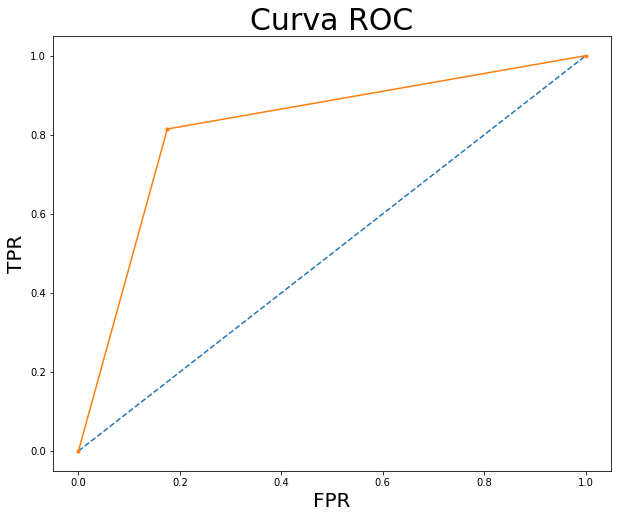

AUC: 0.820


In [70]:
#ROC y AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Curva roc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize = (10, 8))
plt.plot([0,1], [0,1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR', size = 20)
plt.ylabel('TPR', size = 20)
plt.title('Curva ROC', size = 30)
plt.show()

auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

##Trabajar con clases desbalanceadas

Para mejorar el rendimiento de un clasificador sobre clases desbalanceadas existen varias técnicas. En esta parte, veremos cómo tratar con este problema usando (sub/over) sampling de las clases.

In [82]:
print("Distribucion de clases original")
df['CERRO'].value_counts()

Distribucion de clases original


0    624
1    615
Name: CERRO, dtype: int64

In [91]:
# Cargamos dataset desbalanceado
unbalanced_path = 'https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/unbalanced.csv'
data = pd.read_csv(unbalanced_path)  # abrimos el archivo csv y lo cargamos en data
data.head()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [92]:
print("Distribucion de clases original")
data['Class'].value_counts()

Distribucion de clases original


0    225
1    126
Name: Class, dtype: int64

Antes de hacer algo para tratar el desbalance entre las clases primero debemos dividir en train-test.

In [93]:
data_train, data_test, ytrain, ytest = train_test_split(data, data['Class'], test_size=0.3, stratify=data['Class'])

Así queda la proporción de clases en el train después de dividir en train-test.

In [94]:
ytrain.value_counts()

0    157
1     88
Name: Class, dtype: int64

Ahora, usando el dataset anterior, aplicaremos **oversampling** y **subsampling** al train para que queden balanceados. Ejecute el siguiente código y note ahora que las clases están balanceadas. 

In [97]:
print("Distribución de clases usando (over/sub) sampling")
print()

data_train = data_train.reset_index(drop=True)

# oversampling sobre la clase 1
idx = np.random.choice(data_train[data_train['Class'] == 1].index, size=69)
data_oversampled = pd.concat([data_train, data_train.iloc[idx]])
print("Data oversampled on class '1'")
print(data_oversampled['Class'].value_counts())
print()


# subsampling sobre la clase 0
idx = np.random.choice(data_train.loc[data_train.Class == 0].index, size=69, replace=False)
data_subsampled = data_train.drop(data_train.iloc[idx].index)
print("Data subsampled on class '0'")
print(data_subsampled['Class'].value_counts())

Distribución de clases usando (over/sub) sampling

Data oversampled on class '1'
1    157
0    157
Name: Class, dtype: int64

Data subsampled on class '0'
1    88
0    88
Name: Class, dtype: int64


> Nota: librerias como `imblearn` son utiles para esta tarea.



Vamos a entrenar un árbol de decisión (`DecisionTreeClassifier`) sobre los 3 datasets por separado (**original**, con **oversampling** y con **subsampling**) y luego comparamos los resultados usando alguna métrica de evaluación.

In [98]:
from sklearn.metrics import classification_report

# Preparando los data frames para ser compatibles con sklearn

# datos test (mismo para todos los conjuntos de entrenamiento)
X_test = data_test[data_train.columns[:-1]] # todo hasta la penultima columna
y_test = data_test[data_train.columns[-1]]  # la última columna

# datos entrenamiento "originales"
X_orig = data_train[data_train.columns[:-1]] 
y_orig = data_train[data_train.columns[-1]] 

# datos entrenamiento "oversampleados" 
X_over = data_oversampled[data_train.columns[:-1]]
y_over = data_oversampled[data_train.columns[-1]]

# datos entrenamiento "subsampleados"
X_subs = data_subsampled[data_train.columns[:-1]]
y_subs = data_subsampled[data_train.columns[-1]]

A continuación, se ejecuta el clasificador en cada uno de los tres casos, usando como datos de entrada lo del bloque anterior. Para cada caso se entrena con el dataset correspondiente y se evalúa con el conjunto de test (el mismo para los tres casos) obtenido con train_test_split sobre los datos originales. 

Se muestra Precision, Recall y F1-score.

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## Pasos:
##  - instanciar el clasificador con DecisionTreeClassifier()
##  - entrenar con fit()
##  - hacer las predicciones
##  - mostrar precision, recall y f1-score con classification report.

print("ORIGINAL::::::::::")
clf_orig = DecisionTreeClassifier()
clf_orig.fit(X_orig, y_orig)
pred_orig = clf_orig.predict(X_test)
print(classification_report(y_test, pred_orig))

print("OVERSAMPLING::::::::::")
clf_over = DecisionTreeClassifier()
clf_over.fit(X_over, y_over)
pred_over = clf_over.predict(X_test)
print(classification_report(y_test, pred_over))

print("SUBSAMPLING::::::::::")
clf_subs = DecisionTreeClassifier()
clf_subs.fit(X_subs, y_subs)
pred_subs = clf_subs.predict(X_test)
print(classification_report(y_test, pred_subs))

ORIGINAL::::::::::
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.85      0.92      0.89        38

    accuracy                           0.92       106
   macro avg       0.90      0.92      0.91       106
weighted avg       0.92      0.92      0.92       106

OVERSAMPLING::::::::::
              precision    recall  f1-score   support

           0       0.95      0.90      0.92        68
           1       0.83      0.92      0.88        38

    accuracy                           0.91       106
   macro avg       0.89      0.91      0.90       106
weighted avg       0.91      0.91      0.91       106

SUBSAMPLING::::::::::
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        68
           1       0.75      0.95      0.84        38

    accuracy                           0.87       106
   macro avg       0.86      0.89      0.86       106
weighted a

>Estas son dos estrategias para enfrentar un problema desbalanceado. Ahora bien, uno de los enfoques más usados para afrontar este reto es [SMOTE](https://medium.com/analytics-vidhya/balance-your-data-using-smote-98e4d79fcddb). **Se les recomienda ver alguna implementación de esto para el lab**

##Bonus Track: Redes Neuronales

Hasta ahora hemos visto el enfoque tradicional del *Machine Learning*. Ahora bien, en la actualidad la herramienta que más se utiliza es el uso de *Redes Neuronales* que está más cercano al *Deep Learning*.

Si bien esto no es un curso de Aprendizaje Profundo, les daremos una implementación de como utilizar una red neuronal. Para encontrar más información y entender más los conocimientos subyacentes en esta área les dejo esta [lista de reproducción del amigo DotCSV](https://www.youtube.com/watch?v=MRIv2IwFTPg&list=PL-Ogd76BhmcB9OjPucsnc2-piEE96jJDQ&ab_channel=DotCSV) y por supuesto un link de [Medium](https://medium.com/@tharanignanasegaram/artificial-neural-network-a-brief-introduction-572d462666f1)

Muy a groso modo, lo que debemos saber de una red neuronal es que tiene los siguientes elementos:

1.   Neuronas: es el elemento básico de uan red neuronal, aquí es donde "ocurre la magia"(Se aplica una función). Cada neurona se conecta con las neuronas de la capa previa y de la capa siguiente, es decir, cada neurona toma un input, aplica una función dada y luego entrega un output.
2.   Capas: cada capa tiene un numero determinado de neuronas, en este "elemento" encontramos tres tipos de capa:
*Input: Cada neurona es un input. Es decir, si tengo 10 features, esta capa será de 10 inputs
*Output: Cada neurona corresponde a un tipo de output. En un problema de clasificación binaria tendremos solo una neurona.
*Capas ocultas: Son las etapas intermedias donde se ajustan los pesos.

> El proceso que ocurre en un ANN, de forma **SUPERMEGAULTRAHIPER** reducida es que por cada fila de nuestro dataset entran los datos como input, luego se generan miles de regresiones lineales (una por cada neurona) donde cada neurona "calibra" los pesos y "elige" cuales inputs tomar. Luego eso llega a la etapa de salida donde para los valores dados llega a un valor dentro de lo esperado (en este caso 0 o 1). Logicamente las primeras veces el modelo no le achunta nada, asi que para calibrarse, el modelo propaga el error que tuvo hacía atrás con una función de *backpropagation* que permite que se reconfiguren los pesos de cada neurona.



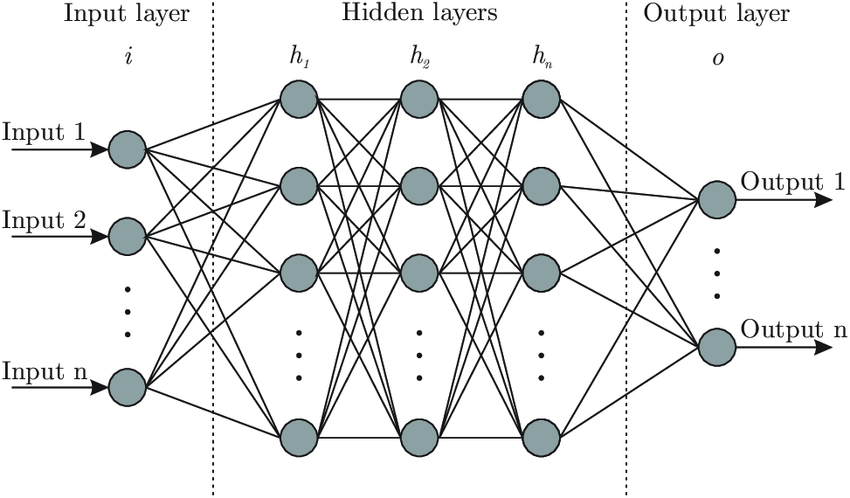

In [168]:
#librerias necesarias para Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping

In [183]:
#Se debe dividir en train - test - validation set
X_train, X_help, y_train, y_help = train_test_split(X, y, test_size = 0.3)
X_val, X_test, y_val, y_test = train_test_split(X_help, y_help, test_size = 0.5)

In [185]:
# Se normalizan los datos mediante un StandardScaler
scaler =  StandardScaler().fit(X_train.values)
X_train_norm = scaler.transform(X_train.values)
X_test_norm = scaler.transform(X_test.values)
X_val_norm = scaler.transform(X_val.values)

In [196]:
# Se procede a crear una red neuronal tipo MLP.
def mi_red(num_hidden_layers, 
           num_neurons_per_layer, 
           dropout_rate,
           activation,
           n_var):
  
  # Capa de entrada
  inputs = tf.keras.Input(shape = (n_var.shape[1],))

  x = tf.keras.layers.Dropout(dropout_rate)(inputs) 

  # Capas ocultas
  for i in range(num_hidden_layers):
    x = tf.keras.layers.Dense(num_neurons_per_layer[i], activation = activation)(x)
    
    x = tf.keras.layers.Dropout(dropout_rate)(x)
  
  # Capa de salida

  outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)

  # Se crea el modelo con el input y los outputs.
  model = tf.keras.Model(inputs=inputs, outputs=outputs)

  return model

def graficos_entreno(metrica, h):

  # Se crea la figura.
  f = plt.figure()

  # Se procede a graficar la métrica ingresada.
  plt.plot(h.history[metrica])
  plt.plot(h.history['val_{}'.format(metrica)])

  # Se realizan las anotaciones del gráfico.
  plt.title('model {}'.format(metrica))
  plt.ylabel(metrica)
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  return f

In [197]:
modelo_tarea = mi_red(num_hidden_layers = 5, 
                   num_neurons_per_layer = [10,20,40,20,10], 
                   dropout_rate = 0.1, 
                   activation = 'relu',
                   n_var = X_train_norm)
modelo_tarea.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 24)]              0         
_________________________________________________________________
dropout_35 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                250       
_________________________________________________________________
dropout_36 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_37 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 40)                840 

In [198]:
# Se plantea un método de regularización como un early stopper.
early_stopping_monitor = EarlyStopping(patience = 10)

# Se utiliza un optimizador como Adam, con el learning rate indicado.
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01)

# Se compila el modelo, donde se plantea un binary_crossentropy debido al tipo de problema. Y se utiliza la métrica correspondiente binary_accuracy y recall dado el desbalanceo de datos.
modelo_tarea.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ['binary_accuracy', 'Recall'])

# Se entrena la red, con una cantidad de épocas máxima de 100, en general se detiene antes por el early_stopper. Además, se utiliza un batch de 256.
history_tarea = modelo_tarea.fit(X_train_norm, y_train, validation_data = (X_val_norm, y_val), epochs = 100, verbose = 1, batch_size = 256, callbacks= early_stopping_monitor)

Epoch 1/100
4/4 [==============================] - 1s 94ms/step - loss: 0.7458 - binary_accuracy: 0.4913 - recall: 0.5195 - val_loss: 0.6942 - val_binary_accuracy: 0.4785 - val_recall: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6862 - binary_accuracy: 0.5340 - recall: 0.1356 - val_loss: 0.6749 - val_binary_accuracy: 0.5860 - val_recall: 0.5361
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.6719 - binary_accuracy: 0.5952 - recall: 0.6552 - val_loss: 0.6551 - val_binary_accuracy: 0.6882 - val_recall: 0.9381
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6476 - binary_accuracy: 0.6251 - recall: 0.8575 - val_loss: 0.6241 - val_binary_accuracy: 0.6882 - val_recall: 0.8144
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6360 - binary_accuracy: 0.6528 - recall: 0.7333 - val_loss: 0.6047 - val_binary_accuracy: 0.6505 - val_recall: 0.6598
Epoch 6/100
4/4 [=======================

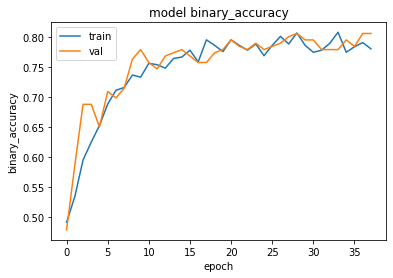

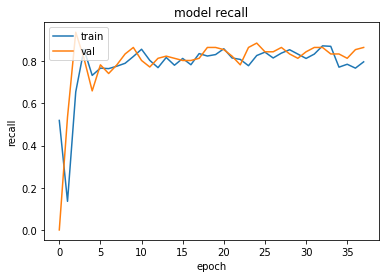

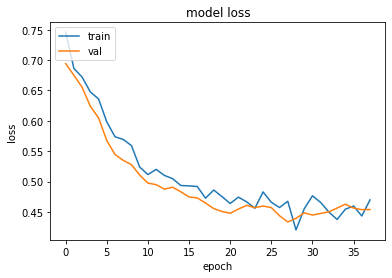

In [199]:
# Se procede a graficar las iteraciones.

f1 = graficos_entreno('binary_accuracy', history_tarea)
plt.show()

f3 = graficos_entreno('recall', history_tarea)
plt.show()

f4 = graficos_entreno('loss', history_tarea)
plt.show()